Name: Josemaria Macedo Carrillo\
Ttile: UN Data Analysis\
Created: 06/15/23\
Last modified:\
DSI

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# LOAD DATA

# First we import our destinations data and do some initial analysis
destinations = pd.read_csv("../data/bsgi_destinations.csv", thousands=",")

# What variables do we have in the dataset?
print("Variables:", destinations.columns)

# Which countries receive exports from Ukraine?
print("Countries of destination for Ukranian exports:", destinations.loc[:, "Country"].unique())

# How many countries are they?
print("Number of countries that get Ukrainian exports", destinations.loc[:, "Country"].nunique())


# Then we import our outbounds data and do some initial analysis
outbound = pd.read_csv("../data/bsgi_outbound_shipments.csv", thousands=",", parse_dates=["Departure date"])

# What variables do we have in the dataset?
print("Variables:", outbound.columns)

# Which countries receive exports from Ukraine?
print("Countries of destination for Ukranian exports:", outbound.loc[:, "Country"].unique())

# How many countries are they?
print("Number of countries that get Ukrainian exports", outbound.loc[:, "Country"].nunique())

Variables: Index(['Country', 'ISO-3', 'Income group', 'Development category',
       'Least Developed Countries', 'UN region', 'Commodity',
       'total metric tons'],
      dtype='object')
Countries of destination for Ukranian exports: ['Afghanistan' 'Algeria' 'Bangladesh' 'Belgium' 'Bulgaria' 'China'
 'Djibouti' 'Egypt' 'Ethiopia' 'France' 'Georgia' 'Germany' 'Greece'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Japan'
 'Jordan' 'Kenya' 'Lebanon' 'Libya' 'Malaysia' 'Morocco' 'Oman' 'Pakistan'
 'Portugal' 'Republic of Korea' 'Romania' 'Saudi Arabia' 'Somalia' 'Spain'
 'Sri Lanka' 'Sudan' 'Thailand' 'The Netherlands' 'Tunisia' 'Türkiye'
 'United Arab Emirates' 'United Kingdom' 'Viet Nam' 'Yemen']
Number of countries that get Ukrainian exports 45
Variables: Index(['Status', '#', 'Vessel name', 'IMO', 'Departure port', 'Country',
       'Commodity', 'Metric tons', 'Departure date', 'Inspection cleared',
       'Income group', 'Flag', 'World Bank region', 'UN region',
 

In [5]:
# Helper functions

def cargo_grouping(df, group, other_cols, sort, asc_bool, new_name = None):
    """
    Create grouped dataframes for charts

    Inputs:
        df(DataFrame): dataset to be used
        group(lst): list of columns to group by
        other_cols(lst): list of columns that are going to be aggregated
        sortby(lst): list of columns to sort dataframe by. If new_name is not
            empty then the new column names should be used.
        new_name(lst): optional paramater with list of new names for grouped
            dataframe. Default is "None".

    Return(DataFrame): grouped dataframe for charts
    """
    cols = other_cols[:]
    cols.extend(group)
    # print("cols", cols)
    # print("group", group)
    # print("other_cols", other_cols)
    df_g = df.loc[:, cols].groupby(group)

    if new_name is not None:
        col_dict = {}
        for i, col in enumerate(other_cols):
            col_dict[col] = new_name[i]
        grouped = df_g.sum().reset_index().rename(columns = col_dict) # PENDING: change this later to include any kind of aggregation
    else:
        grouped = df_g.sum().reset_index()
    
    if sort is None:
        return grouped
    else:
        return grouped.sort_values(by=sort, ascending=asc_bool)

def label(percentage, data):
    """
    Create labels to pie wedges with absolute and percentage values. Reference: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html

    Inputs:
        percentage (float): percentage of the wedge calculated by the pie function
        data (array or Series): values to be summed and get absolute total value
    
    Return (str): string with absolute and percentage values
    """
    absolute = int(np.round(percentage/100.*np.sum(data)))

    return f"{absolute:d}\n({percentage:.1f}%)"

def plot_pie(categories, values, category_title, graph_title):
    """
    Plot pie chart. Reference: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html

    Inputs:
        categories (array or Series): categories for the pie wedges
        values (array or Series): values for the pie wedges
        category_title (str): title for category section
        graph_title (str): title for pie chart
    """
    fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

    wedges, texts, autotexts = ax.pie(values, autopct=lambda pct: label(pct, values),
                                    textprops=dict(color="w"),
                                    wedgeprops=dict(width=0.5), startangle=-40)

    ax.legend(wedges, categories,
            title=category_title,
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=8, weight="bold")

    ax.set_title(graph_title)

    plt.show()

Text(0.5, 1.0, 'Cargo exported by country')

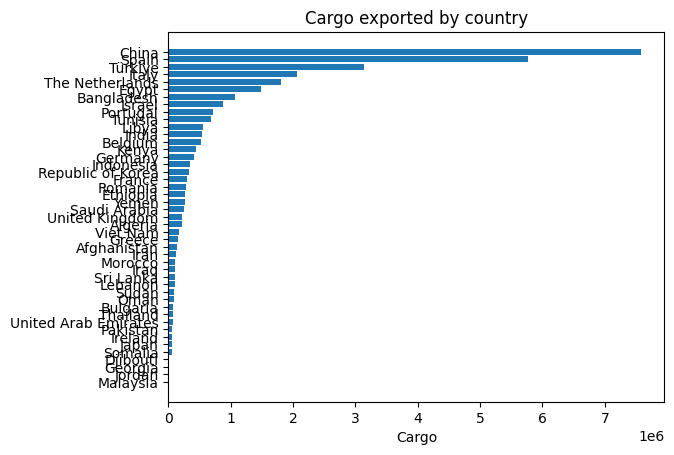

In [6]:
# Cargo exported by country chart (page 1). Reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html

graph_1 = cargo_grouping(destinations, ["Country"], ["total metric tons"], ["cargo"], False, ["cargo"])

plt.rcdefaults()
fig, ax = plt.subplots()

countries = graph_1.loc[:, "Country"].unique()
y_pos = np.arange(graph_1.loc[:, "Country"].nunique())

# PENDING: PUT CARGO VALUES TO BARS AND SEPARATE COUNTRY NAMES AND CARGO VALUES MORE
ax.barh(y_pos, graph_1.loc[:, "cargo"], align='center')
ax.set_yticks(y_pos, labels=countries)
ax.invert_yaxis()
ax.set_xlabel('Cargo')
ax.set_title('Cargo exported by country')


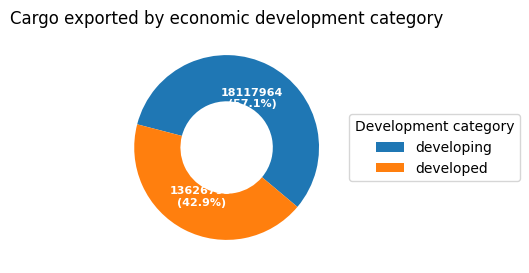

In [7]:
# Cargo exported by economic development (page 1)
graph_2 = cargo_grouping(destinations, ["Development category"], ["total metric tons"], ["cargo"], False, ["cargo"])

cargo = graph_2.loc[:, "cargo"]
categories = graph_2.loc[:, "Development category"]
plot_pie(categories, cargo, "Development category", "Cargo exported by economic development category")

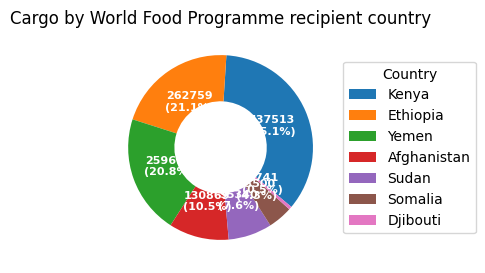

In [8]:
# Cargo by World Food Programme recipient country (page 2)

wfp = outbound.loc[(outbound.loc[:, "Country"] == "Afghanistan") | (outbound.loc[:, "Country"] == "Djibouti") | (outbound.loc[:, "Country"] == "Ethiopia")| (outbound.loc[:, "Country"] == "Kenya") | (outbound.loc[:, "Country"] == "Somalia") | (outbound.loc[:, "Country"] == "Sudan") | (outbound.loc[:, "Country"] == "Yemen")]

# The numbers for some countries (Kenya, Yemen, Sudan, Somalia) look very off. Check if there's a problem with how we're grouping the data
graph_4 = cargo_grouping(wfp, ["Country"], ["Metric tons"], ["cargo"], False, ["cargo"])

values = graph_4.loc[:, "cargo"]
categories = graph_4.loc[:, "Country"]
plot_pie(categories, values, "Country", "Cargo by World Food Programme recipient country")


ValueError: shape mismatch: objects cannot be broadcast to a single shape

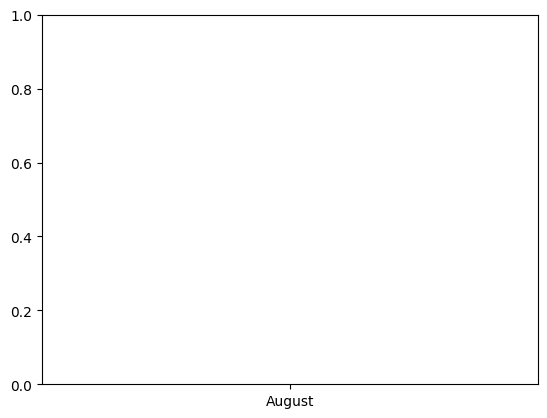

In [9]:
# Cargo exports by port and month (page 3)
outbound_c = outbound.copy()
outbound_c.loc[:, "departure_month"] = outbound_c.loc[:, "Departure date"].dt.month_name()
outbound_c.loc[:, "departure_year"] = outbound_c.loc[:, "Departure date"].dt.year
# outbound_c.loc[:, "year_month"] = outbound_c.loc[:, "departure_month"] + " " + outbound_c.loc[:, "departure_year"].astype(str)

graph_5 = cargo_grouping(outbound_c, ["Departure port", "departure_month", "departure_year"], ["Metric tons"],["departure_year", "departure_month"], True)

months = graph_5.loc[:, "departure_month"]
ports = graph_5.loc[:, "Departure port"].unique()

d = {}
for port in ports:
    d[port] = outbound_c.loc[outbound_c.loc[:, "Departure port"] == port, "Metric tons"].to_numpy()

width = 0.5
fig, ax = plt.subplots()
bottom = np.zeros(3)

for port, cargo in d.items():
    p = ax.bar(months, cargo, width, label=port, bottom=bottom)
    bottom += cargo

ax.set_title("Cargo exports by port and month")
ax.legend(loc="upper right")

plt.show()